In [27]:
import requests
import json
import requests
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET
import sys
import re

In [28]:
from Bio import Entrez
import os
from tqdm import tqdm
# 设置PubMed数据库的邮箱地址
Entrez.email = "your_email@example.com"  # 请替换为您的邮箱地址

# 查询条件
query = "non-Hodgkin lymphoma Taiwan Vietnam"

# 搜索PubMed数据库
handle = Entrez.esearch(db="pubmed", term=query, retmax=100)  # 最多检索100篇文章
record = Entrez.read(handle)
handle.close()

# 下载并保存XML文件
xml_dir = "/Users/benphan/NCKU/Courses/BioMedical_Information_Retrieval/Homework2/dataset_demo"  # 存储XML文件的目录
os.makedirs(xml_dir, exist_ok=True)

for pubmed_id in tqdm(record["IdList"], desc="Processing documents"):
    fetch_handle = Entrez.efetch(db="pubmed", id=pubmed_id, rettype="xml", retmode="xml")
    xml_data = fetch_handle.read()
    fetch_handle.close()

    # 构造XML文件的文件名，通常使用PubMed ID
    xml_file_name = os.path.join(xml_dir, f"{pubmed_id}.xml")

    # 将XML数据保存到文件，使用二进制模式 'wb' 来写入字节数据
    with open(xml_file_name, "wb") as xml_file:
        xml_file.write(xml_data)

    # print(f"已保存：{xml_file_name}")


Processing documents: 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


## Keywords
1. non-Hodgkin lymphoma
2. brain injury

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


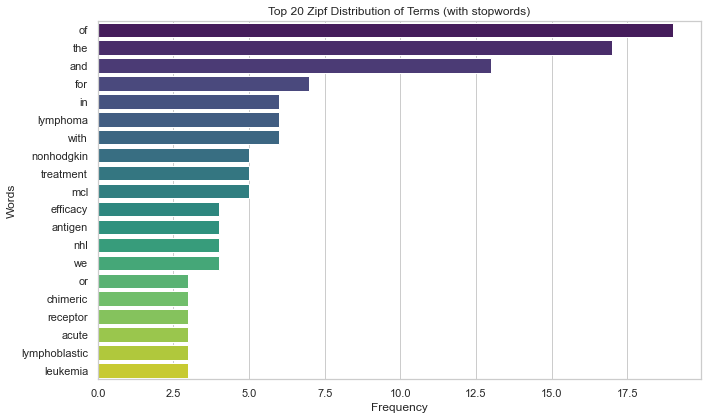

In [31]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

# Sample PubMed documents
documents = [
    "The efficacy of CD22 or CD19 chimeric antigen receptor T (CAR-T) cells in the management of acute lymphoblastic leukemia (ALL) and non-Hodgkin lymphoma (NHL) was observed. Because antigen loss and lack of CAR-T-cell persistence are the leading causes of progressive disease following single-antigen targeting, we evaluated CD22/CD19 dual-targeting CAR-T-cell therapy efficacy and safety in relapsed/refractory B-cell malignancies.",
    "Chimeric antigen receptor (CAR)-T-cell therapies have revolutionized the management of acute lymphoblastic leukemia, non-Hodgkin lymphoma, and multiple myeloma but come at the price of unique toxicities, including cytokine release syndrome, immune effector cell-associated neurotoxicity syndrome, and long-term effects.",
    "Reduced intensity (RIC) and non-myeloablative (NMA) conditioning are preferred for patients with non-Hodgkin lymphoma (NHL) receiving allogeneic hematopoietic stem cell transplantation (allo-HCT). Although prior studies have suggested that higher-intensity regimens within RIC-NMA conditioning are associated with inferior outcomes in patients with NHL, the optimal conditioning regimen remains unknown.",
    "Recent evidence revealed important interactions between clonal hematopoiesis (CH) and cellular therapies established for the treatment of hematologic malignancies. The impact of CH on safety, efficacy, and outcome of chimeric antigen receptor (CAR) T-cell therapy is currently under investigation. We analyzed 110 patients with relapsed/refractory B-cell non-Hodgkin lymphoma (n = 105) or acute lymphoblastic leukemia (ALL) (n = 5), treated with Axicabtagene-Ciloleucel (39%), Tisagenlecleucel (51%), or Brexucabtagene autoleucel (10%). Using error-corrected targeted sequencing, a high CH prevalence of 56.4% (variant allele frequency [VAF] ≥1%) at the time of CAR T-cell infusion was detected. The most frequently mutated gene was.",
    "Mantle cell lymphoma (MCL) primarily affects older adults, accounting for 3-10% of all non-Hodgkin lymphoma (NHL) in western countries. The disease course of MCL is heterogenous; driven by clinical, cytogenetics, and molecular features that shape differences in outcomes, including proliferation index, MIPI scores, and mutational profile such as TP53 aberration. The advent of novel agents has fundamentally evolved the treatment landscape for MCL with treatment strategies that can now be more effectively tailored based on both patient- and disease-specific factors. In this review, we discuss the major classes of novel agents used for the treatment of MCL, focusing on efficacy and notable toxicities of BTK inhibitors. We further examine effective novel combination regimens and, lastly, discuss future directions for the evolution of targeted approaches for the treatment of MCL."
]

def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Tokenize the text without removing stopwords
filtered_tokens = []
for doc in documents:
    tokens = clean_and_tokenize(doc)
    filtered_tokens.extend(tokens)

# Calculate word frequencies
word_freq = Counter(filtered_tokens)

# Sort the words by frequency in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Display only the top 20 frequencies
number_of_words = 20
top_words = dict(list(sorted_word_freq.items())[:number_of_words])

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the Zipf distribution for the top 20 words using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (with stopwords)')
plt.tight_layout()

# Display the plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


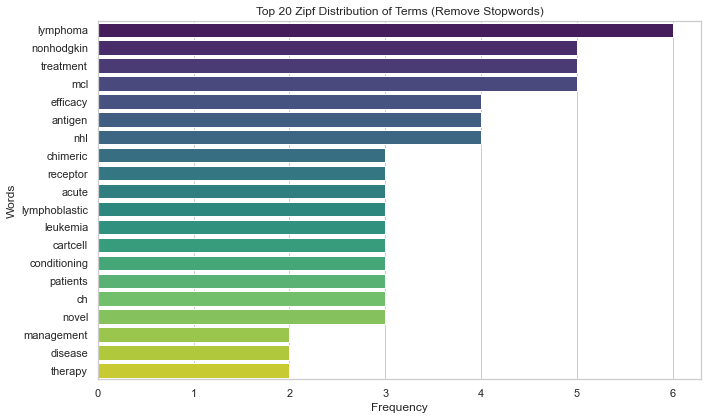

In [33]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')


# Sample PubMed documents
documents = [
    "The efficacy of CD22 or CD19 chimeric antigen receptor T (CAR-T) cells in the management of acute lymphoblastic leukemia (ALL) and non-Hodgkin lymphoma (NHL) was observed. Because antigen loss and lack of CAR-T-cell persistence are the leading causes of progressive disease following single-antigen targeting, we evaluated CD22/CD19 dual-targeting CAR-T-cell therapy efficacy and safety in relapsed/refractory B-cell malignancies.",
    "Chimeric antigen receptor (CAR)-T-cell therapies have revolutionized the management of acute lymphoblastic leukemia, non-Hodgkin lymphoma, and multiple myeloma but come at the price of unique toxicities, including cytokine release syndrome, immune effector cell-associated neurotoxicity syndrome, and long-term effects.",
    "Reduced intensity (RIC) and non-myeloablative (NMA) conditioning are preferred for patients with non-Hodgkin lymphoma (NHL) receiving allogeneic hematopoietic stem cell transplantation (allo-HCT). Although prior studies have suggested that higher-intensity regimens within RIC-NMA conditioning are associated with inferior outcomes in patients with NHL, the optimal conditioning regimen remains unknown.",
    "Recent evidence revealed important interactions between clonal hematopoiesis (CH) and cellular therapies established for the treatment of hematologic malignancies. The impact of CH on safety, efficacy, and outcome of chimeric antigen receptor (CAR) T-cell therapy is currently under investigation. We analyzed 110 patients with relapsed/refractory B-cell non-Hodgkin lymphoma (n = 105) or acute lymphoblastic leukemia (ALL) (n = 5), treated with Axicabtagene-Ciloleucel (39%), Tisagenlecleucel (51%), or Brexucabtagene autoleucel (10%). Using error-corrected targeted sequencing, a high CH prevalence of 56.4% (variant allele frequency [VAF] ≥1%) at the time of CAR T-cell infusion was detected. The most frequently mutated gene was.",
    "Mantle cell lymphoma (MCL) primarily affects older adults, accounting for 3-10% of all non-Hodgkin lymphoma (NHL) in western countries. The disease course of MCL is heterogenous; driven by clinical, cytogenetics, and molecular features that shape differences in outcomes, including proliferation index, MIPI scores, and mutational profile such as TP53 aberration. The advent of novel agents has fundamentally evolved the treatment landscape for MCL with treatment strategies that can now be more effectively tailored based on both patient- and disease-specific factors. In this review, we discuss the major classes of novel agents used for the treatment of MCL, focusing on efficacy and notable toxicities of BTK inhibitors. We further examine effective novel combination regimens and, lastly, discuss future directions for the evolution of targeted approaches for the treatment of MCL."
]


def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Remove stopwords and tokenize the text
filtered_tokens = []
for doc in documents:
    tokens = clean_and_tokenize(doc)
    filtered_tokens.extend([word for word in tokens if word not in stopwords.words('english')])

# Calculate word frequencies
word_freq = Counter(filtered_tokens)

# Sort the words by frequency in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Display only the top 100 frequencies
number_of_words = 20
top_100_words = dict(list(sorted_word_freq.items())[:number_of_words])

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the Zipf distribution for the top 100 words using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(top_100_words.values()), y=list(top_100_words.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (Remove Stopwords)')
plt.tight_layout()

# Display the plot
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


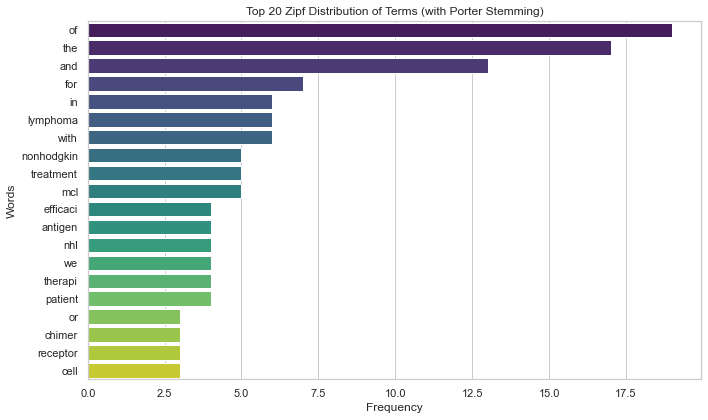

In [34]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

# Sample PubMed documents
documents = [
    "The efficacy of CD22 or CD19 chimeric antigen receptor T (CAR-T) cells in the management of acute lymphoblastic leukemia (ALL) and non-Hodgkin lymphoma (NHL) was observed. Because antigen loss and lack of CAR-T-cell persistence are the leading causes of progressive disease following single-antigen targeting, we evaluated CD22/CD19 dual-targeting CAR-T-cell therapy efficacy and safety in relapsed/refractory B-cell malignancies.",
    "Chimeric antigen receptor (CAR)-T-cell therapies have revolutionized the management of acute lymphoblastic leukemia, non-Hodgkin lymphoma, and multiple myeloma but come at the price of unique toxicities, including cytokine release syndrome, immune effector cell-associated neurotoxicity syndrome, and long-term effects.",
    "Reduced intensity (RIC) and non-myeloablative (NMA) conditioning are preferred for patients with non-Hodgkin lymphoma (NHL) receiving allogeneic hematopoietic stem cell transplantation (allo-HCT). Although prior studies have suggested that higher-intensity regimens within RIC-NMA conditioning are associated with inferior outcomes in patients with NHL, the optimal conditioning regimen remains unknown.",
    "Recent evidence revealed important interactions between clonal hematopoiesis (CH) and cellular therapies established for the treatment of hematologic malignancies. The impact of CH on safety, efficacy, and outcome of chimeric antigen receptor (CAR) T-cell therapy is currently under investigation. We analyzed 110 patients with relapsed/refractory B-cell non-Hodgkin lymphoma (n = 105) or acute lymphoblastic leukemia (ALL) (n = 5), treated with Axicabtagene-Ciloleucel (39%), Tisagenlecleucel (51%), or Brexucabtagene autoleucel (10%). Using error-corrected targeted sequencing, a high CH prevalence of 56.4% (variant allele frequency [VAF] ≥1%) at the time of CAR T-cell infusion was detected. The most frequently mutated gene was.",
    "Mantle cell lymphoma (MCL) primarily affects older adults, accounting for 3-10% of all non-Hodgkin lymphoma (NHL) in western countries. The disease course of MCL is heterogenous; driven by clinical, cytogenetics, and molecular features that shape differences in outcomes, including proliferation index, MIPI scores, and mutational profile such as TP53 aberration. The advent of novel agents has fundamentally evolved the treatment landscape for MCL with treatment strategies that can now be more effectively tailored based on both patient- and disease-specific factors. In this review, we discuss the major classes of novel agents used for the treatment of MCL, focusing on efficacy and notable toxicities of BTK inhibitors. We further examine effective novel combination regimens and, lastly, discuss future directions for the evolution of targeted approaches for the treatment of MCL."
]

def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Tokenize the text without removing stopwords
filtered_tokens = []
for doc in documents:
    tokens = clean_and_tokenize(doc)
    filtered_tokens.extend(tokens)

# Apply Porter's stemming algorithm
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Calculate word frequencies
word_freq = Counter(stemmed_tokens)

# Sort the words by frequency in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Display only the top 20 frequencies
number_of_words = 20
top_words = dict(list(sorted_word_freq.items())[:number_of_words])

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the Zipf distribution for the top 20 stemmed words using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (with Porter Stemming)')
plt.tight_layout()

# Display the plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


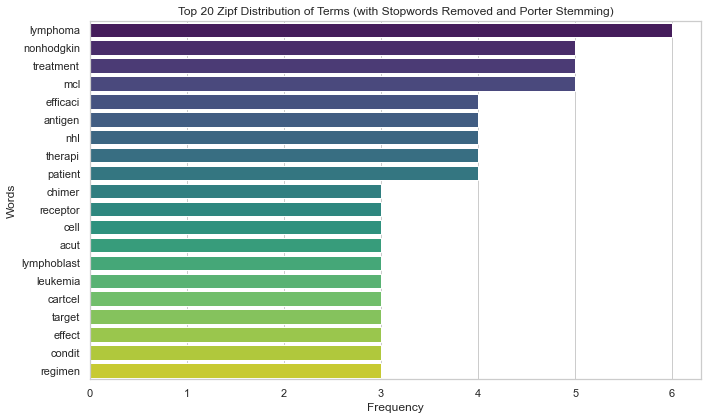

In [35]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

# Sample PubMed documents
documents = [
    "The efficacy of CD22 or CD19 chimeric antigen receptor T (CAR-T) cells in the management of acute lymphoblastic leukemia (ALL) and non-Hodgkin lymphoma (NHL) was observed. Because antigen loss and lack of CAR-T-cell persistence are the leading causes of progressive disease following single-antigen targeting, we evaluated CD22/CD19 dual-targeting CAR-T-cell therapy efficacy and safety in relapsed/refractory B-cell malignancies.",
    "Chimeric antigen receptor (CAR)-T-cell therapies have revolutionized the management of acute lymphoblastic leukemia, non-Hodgkin lymphoma, and multiple myeloma but come at the price of unique toxicities, including cytokine release syndrome, immune effector cell-associated neurotoxicity syndrome, and long-term effects.",
    "Reduced intensity (RIC) and non-myeloablative (NMA) conditioning are preferred for patients with non-Hodgkin lymphoma (NHL) receiving allogeneic hematopoietic stem cell transplantation (allo-HCT). Although prior studies have suggested that higher-intensity regimens within RIC-NMA conditioning are associated with inferior outcomes in patients with NHL, the optimal conditioning regimen remains unknown.",
    "Recent evidence revealed important interactions between clonal hematopoiesis (CH) and cellular therapies established for the treatment of hematologic malignancies. The impact of CH on safety, efficacy, and outcome of chimeric antigen receptor (CAR) T-cell therapy is currently under investigation. We analyzed 110 patients with relapsed/refractory B-cell non-Hodgkin lymphoma (n = 105) or acute lymphoblastic leukemia (ALL) (n = 5), treated with Axicabtagene-Ciloleucel (39%), Tisagenlecleucel (51%), or Brexucabtagene autoleucel (10%). Using error-corrected targeted sequencing, a high CH prevalence of 56.4% (variant allele frequency [VAF] ≥1%) at the time of CAR T-cell infusion was detected. The most frequently mutated gene was.",
    "Mantle cell lymphoma (MCL) primarily affects older adults, accounting for 3-10% of all non-Hodgkin lymphoma (NHL) in western countries. The disease course of MCL is heterogenous; driven by clinical, cytogenetics, and molecular features that shape differences in outcomes, including proliferation index, MIPI scores, and mutational profile such as TP53 aberration. The advent of novel agents has fundamentally evolved the treatment landscape for MCL with treatment strategies that can now be more effectively tailored based on both patient- and disease-specific factors. In this review, we discuss the major classes of novel agents used for the treatment of MCL, focusing on efficacy and notable toxicities of BTK inhibitors. We further examine effective novel combination regimens and, lastly, discuss future directions for the evolution of targeted approaches for the treatment of MCL."
]

def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Remove stopwords and tokenize the text
filtered_tokens = []
for doc in documents:
    tokens = clean_and_tokenize(doc)
    filtered_tokens.extend([word for word in tokens if word not in stopwords.words('english')])

# Apply Porter's stemming algorithm to the filtered tokens
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Calculate word frequencies
word_freq = Counter(stemmed_tokens)

# Sort the words by frequency in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Display only the top 20 frequencies
number_of_words = 20
top_words = dict(list(sorted_word_freq.items())[:number_of_words])

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the Zipf distribution for the top 20 stemmed words using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (with Stopwords Removed and Porter Stemming)')
plt.tight_layout()

# Display the plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


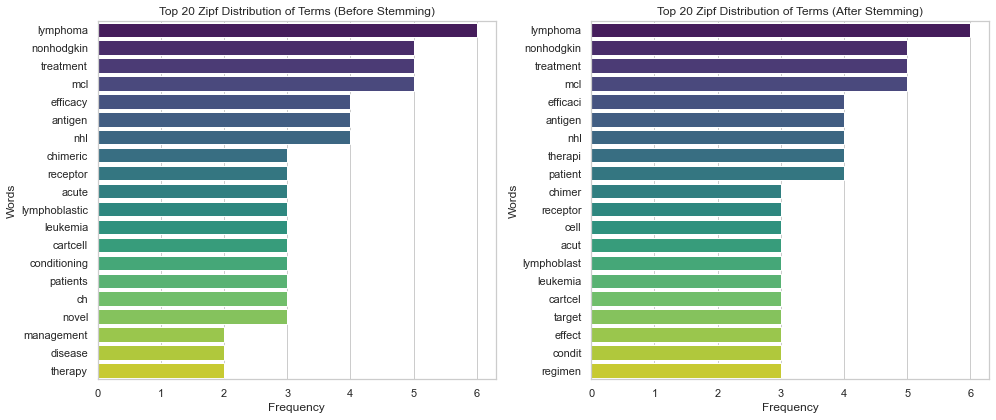

In [36]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

# Sample PubMed documents
documents = [
    "The efficacy of CD22 or CD19 chimeric antigen receptor T (CAR-T) cells in the management of acute lymphoblastic leukemia (ALL) and non-Hodgkin lymphoma (NHL) was observed. Because antigen loss and lack of CAR-T-cell persistence are the leading causes of progressive disease following single-antigen targeting, we evaluated CD22/CD19 dual-targeting CAR-T-cell therapy efficacy and safety in relapsed/refractory B-cell malignancies.",
    "Chimeric antigen receptor (CAR)-T-cell therapies have revolutionized the management of acute lymphoblastic leukemia, non-Hodgkin lymphoma, and multiple myeloma but come at the price of unique toxicities, including cytokine release syndrome, immune effector cell-associated neurotoxicity syndrome, and long-term effects.",
    "Reduced intensity (RIC) and non-myeloablative (NMA) conditioning are preferred for patients with non-Hodgkin lymphoma (NHL) receiving allogeneic hematopoietic stem cell transplantation (allo-HCT). Although prior studies have suggested that higher-intensity regimens within RIC-NMA conditioning are associated with inferior outcomes in patients with NHL, the optimal conditioning regimen remains unknown.",
    "Recent evidence revealed important interactions between clonal hematopoiesis (CH) and cellular therapies established for the treatment of hematologic malignancies. The impact of CH on safety, efficacy, and outcome of chimeric antigen receptor (CAR) T-cell therapy is currently under investigation. We analyzed 110 patients with relapsed/refractory B-cell non-Hodgkin lymphoma (n = 105) or acute lymphoblastic leukemia (ALL) (n = 5), treated with Axicabtagene-Ciloleucel (39%), Tisagenlecleucel (51%), or Brexucabtagene autoleucel (10%). Using error-corrected targeted sequencing, a high CH prevalence of 56.4% (variant allele frequency [VAF] ≥1%) at the time of CAR T-cell infusion was detected. The most frequently mutated gene was.",
    "Mantle cell lymphoma (MCL) primarily affects older adults, accounting for 3-10% of all non-Hodgkin lymphoma (NHL) in western countries. The disease course of MCL is heterogenous; driven by clinical, cytogenetics, and molecular features that shape differences in outcomes, including proliferation index, MIPI scores, and mutational profile such as TP53 aberration. The advent of novel agents has fundamentally evolved the treatment landscape for MCL with treatment strategies that can now be more effectively tailored based on both patient- and disease-specific factors. In this review, we discuss the major classes of novel agents used for the treatment of MCL, focusing on efficacy and notable toxicities of BTK inhibitors. We further examine effective novel combination regimens and, lastly, discuss future directions for the evolution of targeted approaches for the treatment of MCL."
]

def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Remove stopwords and tokenize the text
filtered_tokens = []
for doc in documents:
    tokens = clean_and_tokenize(doc)
    filtered_tokens.extend([word for word in tokens if word not in stopwords.words('english')])

# Apply Porter's stemming algorithm to the filtered tokens
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Calculate word frequencies before stemming
word_freq_before = Counter(filtered_tokens)

# Calculate word frequencies after stemming
word_freq_after = Counter(stemmed_tokens)

# Sort the words by frequency in descending order
sorted_word_freq_before = dict(sorted(word_freq_before.items(), key=lambda item: item[1], reverse=True))
sorted_word_freq_after = dict(sorted(word_freq_after.items(), key=lambda item: item[1], reverse=True))

# Display only the top 20 frequencies
number_of_words = 20
top_words_before = dict(list(sorted_word_freq_before.items())[:number_of_words])
top_words_after = dict(list(sorted_word_freq_after.items())[:number_of_words])

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the Zipf distribution before and after Porter's stemming
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
ax = sns.barplot(x=list(top_words_before.values()), y=list(top_words_before.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (Before Stemming)')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=list(top_words_after.values()), y=list(top_words_after.keys()), palette="viridis")
ax.set(xlabel='Frequency', ylabel='Words')
plt.title(f'Top {number_of_words} Zipf Distribution of Terms (After Stemming)')

plt.tight_layout()

# Display the plots
plt.show()


In [37]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Example words to be stemmed
words = ["jumps", "jumping", "jumper", "jumped", "cats", "cacti", "better", "betterment"]

# Stem each word
stemmed_words = [stemmer.stem(word) for word in words]

# Print the stemmed words
for original, stemmed in zip(words, stemmed_words):
    print(f"{original} -> {stemmed}")


jumps -> jump
jumping -> jump
jumper -> jumper
jumped -> jump
cats -> cat
cacti -> cacti
better -> better
betterment -> better


In [38]:
# A Naive recursive Python program to find minimum number
# operations to convert str1 to str2


def editDistance(str1, str2, m, n):

	# If first string is empty, the only option is to
	# insert all characters of second string into first
	if m == 0:
		return n

	# If second string is empty, the only option is to
	# remove all characters of first string
	if n == 0:
		return m

	# If last characters of two strings are same, nothing
	# much to do. Ignore last characters and get count for
	# remaining strings.
	if str1[m-1] == str2[n-1]:
		return editDistance(str1, str2, m-1, n-1)

	# If last characters are not same, consider all three
	# operations on last character of first string, recursively
	# compute minimum cost for all three operations and take
	# minimum of three values.
	return 1 + min(editDistance(str1, str2, m, n-1), # Insert
				editDistance(str1, str2, m-1, n), # Remove
				editDistance(str1, str2, m-1, n-1) # Replace
				)


# Driver code
str1 = "sunday"
str2 = "saturday"
print (editDistance(str1, str2, len(str1), len(str2)))

# This code is contributed by Bhavya Jain


3
